In [91]:
import pandas as pd 
import numpy as np

In [92]:
data = pd.read_excel('training_set_rel3.xls')

In [93]:
full_data = data[data['essay_set']==1]
full_data

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,1,"Dear @LOCATION1, I think that computers have a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,1,Did you know that more and more people these d...,5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,1,@PERCENT1 of people agree that computers make ...,5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,1,"Dear reader, @ORGANIZATION1 has had a dramatic...",4.0,5.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,1,In the @LOCATION1 we have the technology of a ...,5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
from sklearn.cross_validation import train_test_split

In [95]:
import nltk
import string
from nltk.stem.porter import PorterStemmer

In [96]:
stemmer = PorterStemmer()
def stem_tokens(tokens,stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

In [97]:
def tokenized(text):
    tokens = nltk.word_tokenize(text)
    tokens = [i for i in tokens if i not in string.punctuation]
    stems = stem_tokens(tokens,stemmer)
    return stems

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIV


tfv = TFIV(tokenizer=tokenized,min_df=3,  max_features=None, 
         analyzer='word',token_pattern=r'\w{1,}',
        ngram_range=(1, 2), use_idf=1,smooth_idf=1,sublinear_tf=1,
        stop_words = 'english')

In [99]:
tfv.fit(full_data['essay']) # This is the slow part!
X_all = tfv.transform(full_data['essay'])


In [100]:
X_all

<1783x20075 sparse matrix of type '<class 'numpy.float64'>'
	with 328291 stored elements in Compressed Sparse Row format>

In [101]:
x1,x2,y1,y2 = train_test_split(X_all,full_data['domain1_score'],random_state=0,test_size=0.1)

In [102]:
x1.shape,y1.shape,x2.shape,y2.shape

((1604, 20075), (1604,), (179, 20075), (179,))

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
model = LogisticRegression()

In [105]:
model.fit(x1,y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
model.score(x2,y2)

0.41899441340782123

In [107]:
from sklearn.neighbors import KNeighborsRegressor

In [108]:
model = KNeighborsRegressor()

In [109]:
model.fit(x1,y1)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [110]:
model.score(x2,y2)

0.19128221444479798

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
model = KNeighborsClassifier()

In [113]:
model.fit(x1,y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [114]:
model.score(x2,y2)

0.36312849162011174

In [115]:
from sklearn import svm

In [116]:
model = svm.SVC()

In [117]:
model.fit(x1,y1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [118]:
model.score(x2,y2)

0.39106145251396646

In [119]:
k= range(1,31)

In [120]:
k

range(1, 31)

In [121]:
s =[]

In [122]:
for i in k:
    model = svm.SVC(C=i)
    model.fit(x1,y1)
    s.append(model.score(x2,y2))
    

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'for score')

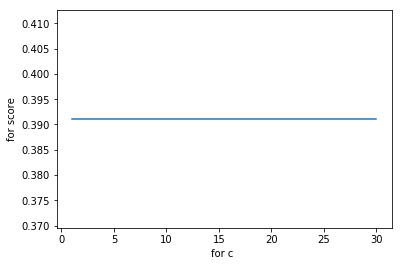

In [124]:
plt.plot(k,s)
plt.xlabel('for c ')
plt.ylabel('for score')

In [125]:
k = range(1,50)
s=[]
for i in k:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x1,y1)
    s.append(model.score(x2,y2))

Text(0,0.5,'for score')

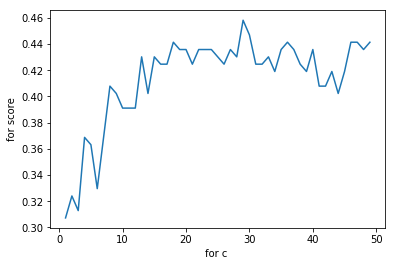

In [126]:
plt.plot(k,s)
plt.xlabel('for c ')
plt.ylabel('for score')

In [127]:
model = KNeighborsClassifier(n_neighbors=47)
model.fit(x1,y1)
model.score(x2,y2)

0.44134078212290501

In [128]:
k = range(1,50)
s=[]
for i in k:
    model = LogisticRegression(C=i)
    model.fit(x1,y1)
    s.append(model.score(x2,y2))

Text(0,0.5,'for score')

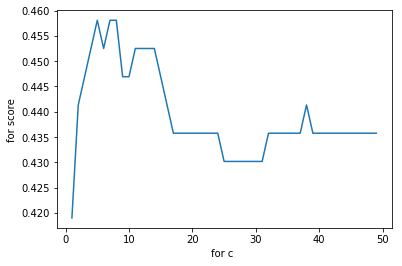

In [129]:
plt.plot(k,s)
plt.xlabel('for c ')
plt.ylabel('for score')

In [130]:
from sklearn.naive_bayes import MultinomialNB

In [131]:
model = MultinomialNB()

In [132]:
model.fit(x1,y1)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [133]:
model.score(x2,y2)

0.39106145251396646

Text(0,0.5,'for score')

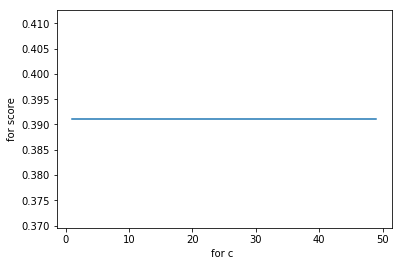

In [134]:
k = range(1,50)
s=[]
for i in k:
    model = MultinomialNB(alpha=i)
    model.fit(x1,y1)
    s.append(model.score(x2,y2))
    
plt.plot(k,s)
plt.xlabel('for c ')
plt.ylabel('for score')

In [135]:
from sklearn.linear_model import SGDClassifier

In [136]:
model = SGDClassifier()

/home/saddam/ML/venv3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [137]:
model.fit(x1,y1)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [138]:
model.score(x2,y2)

0.37988826815642457